In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.randn()

-3.3538569072025917

In [3]:
N = 100
x = np.linspace(0, 1, N)
y_truth =  - 10 * (x - 0.5) ** 2 + 3
y = y_truth + 0.5 * np.random.randn(N)

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
df = pd.DataFrame({"x": x, "y": y})
df.head()

,x,y
0,0.000000,0.983658
1,0.010101,1.005419
2,0.020202,-0.341981
3,0.030303,0.246569
4,0.040404,1.638807


- `y = coeff_1 * x + intercept`
- `y = coeff_1 * x + coeff_2 * x^2 + intercept`

...

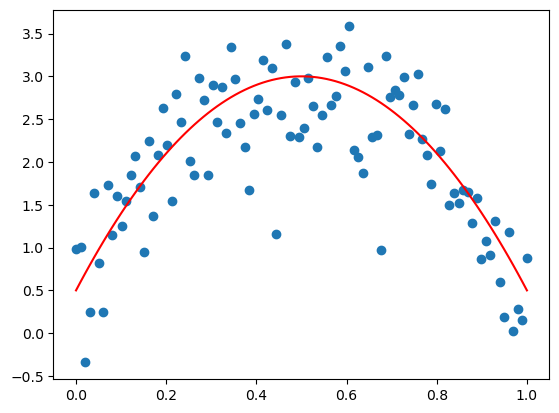

In [6]:
plt.plot(x, y_truth, c='r');
plt.scatter(x, y);

In [8]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

In [9]:
X = x.reshape(-1, 1)
X.shape, y.shape

((100, 1), (100,))

In [22]:
# pipe = Pipeline([
#     ('poly', PolynomialFeatures(degree=30, include_bias=False)),
#     ('ridge', Ridge(alpha=0.1))
# ])

pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=50, include_bias=False)),
    ('linear', LinearRegression())
])
pipe.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=50, include_bias=False)),
                ('linear', LinearRegression())])

In [23]:
pred = pipe.predict(X)
mean_absolute_error(y, pred)

0.4751780168654715

In [32]:
x_to_plot_pred = np.linspace(0.01, 0.99, 10_000)
pred = pipe.predict(x_to_plot_pred.reshape(-1, 1))

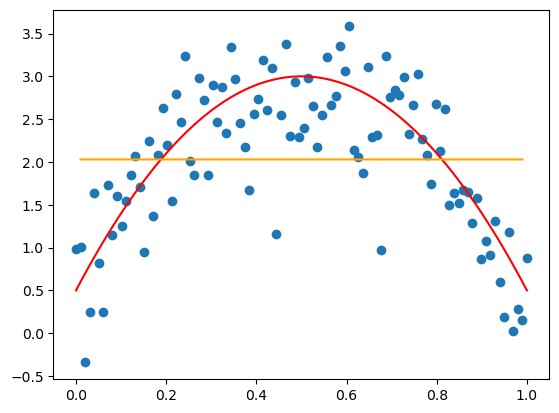

In [33]:
plt.plot(x, y_truth, c='r');
plt.scatter(x, y);
plt.plot(x_to_plot_pred, pred, c='orange');

In [34]:
from sklearn.model_selection import train_test_split

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 1), (80,), (20, 1), (20,))

Alpha:  0.0 Coefficients:  [-1.37562392e+02  1.10094612e+04 -4.81886292e+05  1.31408754e+07
 -2.30209612e+08  2.70730638e+09 -2.22401568e+10  1.31324346e+11
 -5.66688508e+11  1.79361979e+12 -4.10839932e+12  6.50838109e+12
 -6.20070081e+12  1.37202007e+12  4.41930784e+12 -4.34764151e+12
 -1.75475966e+12  4.92450712e+12 -2.47774769e+11 -4.77246418e+12
  2.39612441e+12  3.57245515e+12 -5.63247360e+12  3.45609639e+12
 -1.05675012e+12  1.33566679e+11] 


Alpha:  0.001 Coefficients:  [ 9.58930416 -9.60494604 -3.86074939  2.22294782  3.86890022  2.79665678
  0.8931449  -0.79951601 -1.89546457 -2.36605706 -2.33582589 -1.97071674
 -1.42528271 -0.82246574 -0.24976984  0.23719205  0.60850272  0.85342043
  0.97456398  0.98316217  0.89539704  0.72972304  0.50499336  0.23922082
 -0.05118141 -0.35180892] 


Alpha:  0.01 Coefficients:  [ 7.20554301 -4.52423109 -3.17822856 -0.68186307  0.62364999  0.92989445
  0.71948368  0.33109516 -0.05410435 -0.35803267 -0.55931302 -0.6639632
 -0.68894843 -0.6536964

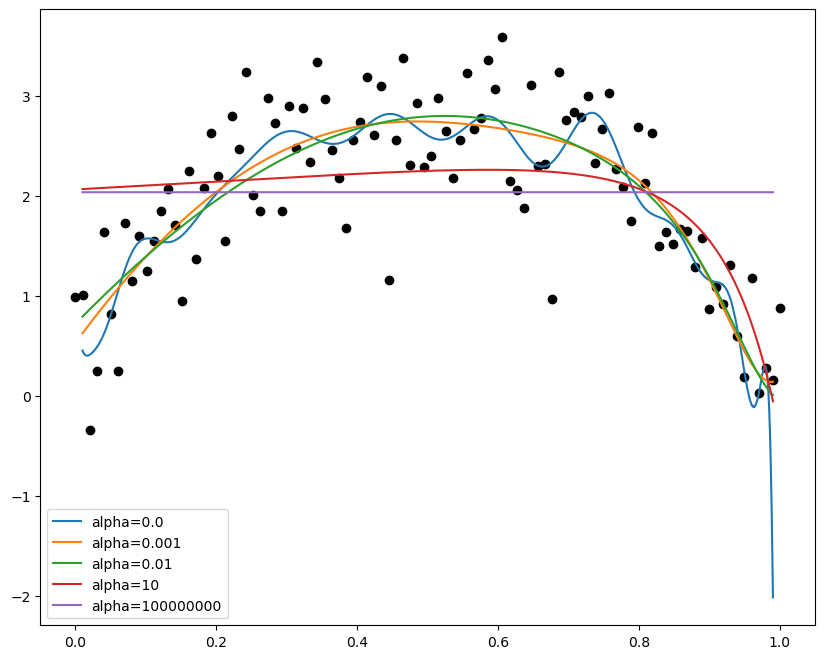

In [35]:
alpha_vec = [0.0, 0.001, 0.01, 10, 100_000_000]
mae_error = []

fig, ax = plt.subplots(figsize=(10, 8))
# ax.plot(x, y_truth, c='r');
ax.scatter(x, y, c='black');

for alpha in alpha_vec:
    # print(alpha)

    if alpha == 0:
        model = LinearRegression()
    else:
        model = Ridge(alpha=alpha)
    pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=26, include_bias=False)),
    ('ridge', model)
    ])
    pipe.fit(X_train, y_train)
    print("Alpha: ", alpha, "Coefficients: ", pipe.steps[1][1].coef_, "\n\n")

    pred = pipe.predict(X_test)
    error = mean_absolute_error(y_test, pred)
    mae_error.append(error)

    to_plot_pred = pipe.predict(x_to_plot_pred.reshape(-1, 1))
    ax.plot(x_to_plot_pred, to_plot_pred, label=f'alpha={alpha}')
plt.legend(loc=3)
plt.show()

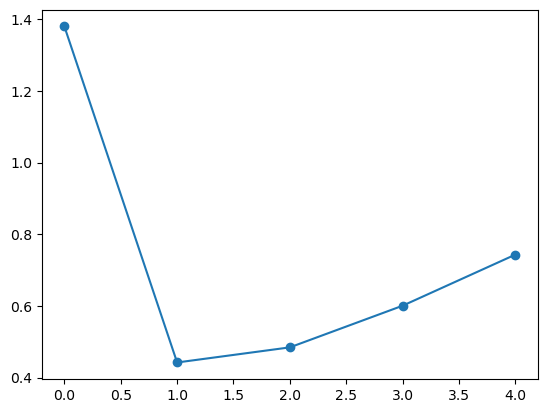

In [36]:
plt.plot(mae_error, 'o-');

In [37]:
alpha_vec[np.argmin(mae_error)], np.min(mae_error)

(0.001, 0.4420597868963254)

In [ ]:
mae_error

[0.5180157630167799,
 0.40903878038951313,
 0.4033536129055489,
 0.6972484632046447,
 0.910650781799961]